In [2]:
import numpy as np
import pandas as pd
ecg_train=pd.read_csv("mitbih_train.csv",header=None)

In [73]:
ecg_train.shape

(87554, 188)

In [5]:
ecg_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y_train=ecg_train.iloc[:,187] 


In [7]:
y_train.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 187, dtype: float64

In [8]:
cata=y_train.value_counts().reset_index()
cata


,index,187
0,0.0,72471
1,4.0,6431
2,2.0,5788
3,1.0,2223
4,3.0,641


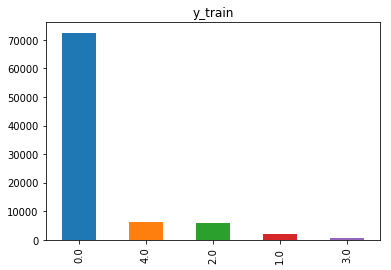

In [52]:
y_train.value_counts().plot(kind="bar", title="y_train")

In [47]:
x_train=ecg_train.iloc[:,0:187]


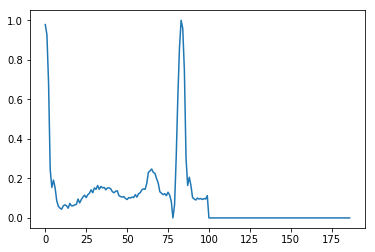

In [49]:
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
plt.plot(x_train.iloc[0,:])

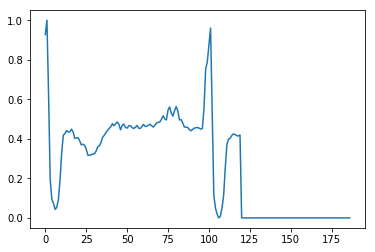

In [11]:
from matplotlib import pyplot as plt
plt.plot(x_train.iloc[5,:])

# Visualize one signal from each class in the same graph

In [39]:
import numpy as np
class0=np.where(y_train==0)
class0

(array([    0,     1,     2, ..., 72468, 72469, 72470], dtype=int64),)

In [40]:
class0=class0[0]
type(class0)

numpy.ndarray

In [80]:
class1=np.where(y_train==1)[0]
class2=np.where(y_train==2)[0]
class3=np.where(y_train==3)[0]
class4=np.where(y_train==4)[0]

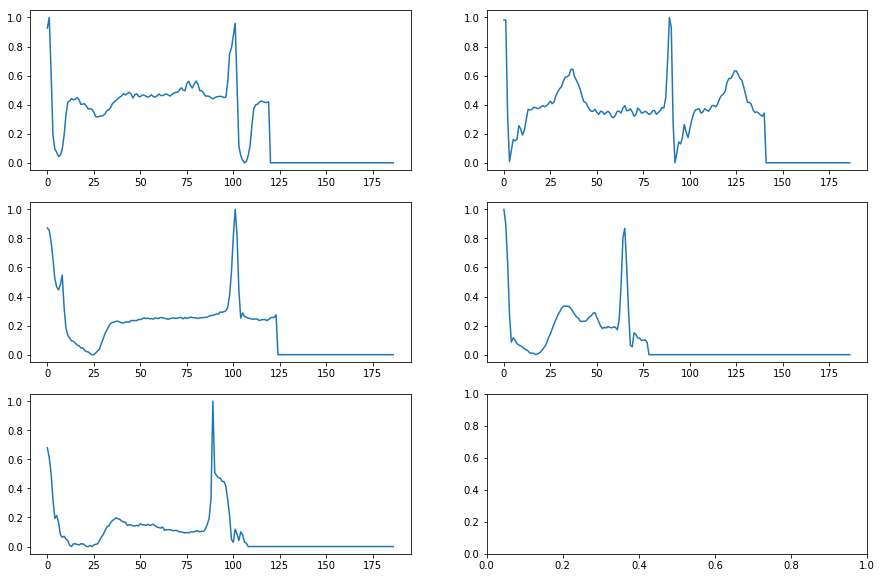

In [83]:
f, axes = plt.subplots(3, 2, sharex=False, sharey=False) 
f.set_figheight(10)
f.set_figwidth(15)
axes[0,0].plot(x_train.iloc[class0[5],:])
axes[0,1].plot(x_train.iloc[class1[5],:])
axes[1,0].plot(x_train.iloc[class2[5],:])
axes[1,1].plot(x_train.iloc[class3[5],:])
axes[2,0].plot(x_train.iloc[class4[5],:])

Text(0.5,1,'ECG Signal')

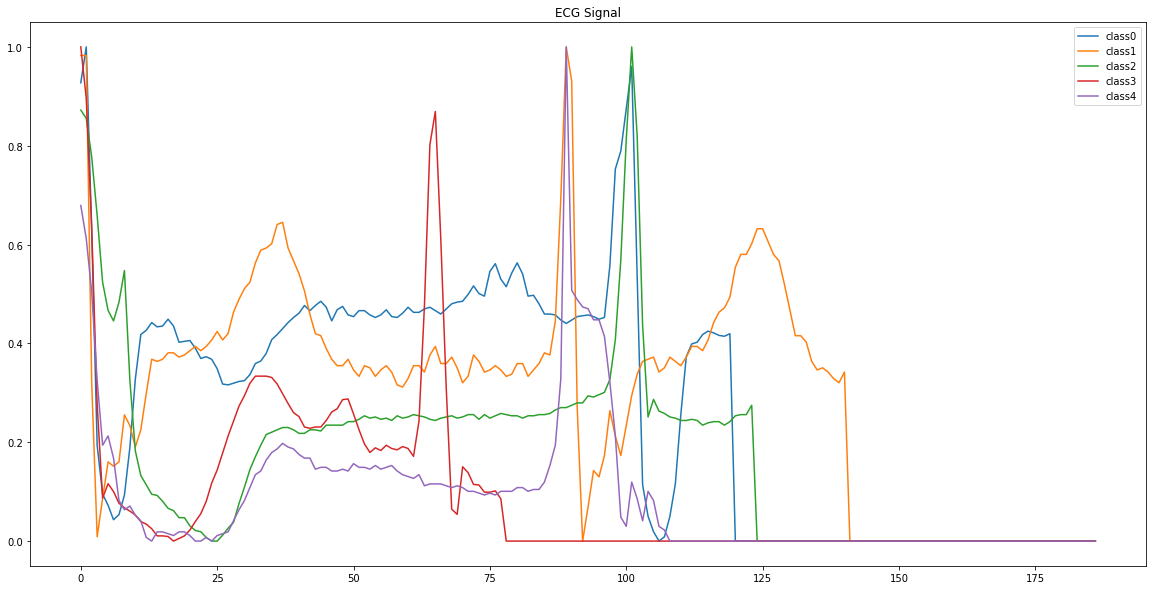

In [42]:
plt.figure(figsize=(20,10))
plt.plot(x_train.iloc[class0[5],:],label='class0')
plt.plot(x_train.iloc[class1[5],:],label='class1')
plt.plot(x_train.iloc[class2[5],:],label='class2')
plt.plot(x_train.iloc[class3[5],:],label='class3')
plt.plot(x_train.iloc[class4[5],:],label='class4')
plt.legend()
plt.title('ECG Signal')

In [84]:
from scipy.signal import find_peaks,peak_widths,peak_prominences,argrelmin,argrelmax,argrelextrema,spectrogram
pk=find_peaks(x_train.iloc[5,:])
print(pk)

(array([  1,  13,  16,  20,  23,  41,  44,  48,  51,  56,  60,  64,  72,
        76,  80,  83,  93, 101, 115, 119], dtype=int64), {})


# Extract the Features

In [44]:
peaks=[]
height=[]
width=[]
prominance=[]
arg_min=[]
arg_max=[]
for i in range(len(x_train)):
    peak,hei=find_peaks(x_train.iloc[i,:],height=0)
    peaks.append(peak)
    height.append(hei['peak_heights'])
    wid=peak_widths(x_train.iloc[i,:],peak)[0]
    width.append(wid)
    pro=peak_prominences(x_train.iloc[i,:],peak)[0]
    prominance.append(pro)
    amin=argrelmin(np.array(x_train.iloc[i,:]))[0]
    arg_min.append(amin)
    amax=argrelmax(np.array(x_train.iloc[i,:]))[0]
    arg_max.append(amax)

In [45]:
f1_len=max([len(i) for i in peaks])
f2_len=max([len(i) for i in height])
f3_len=max([len(i) for i in width])
f4_len=max([len(i) for i in prominance])
f5_len=max([len(i) for i in arg_min])
f6_len=max([len(i) for i in arg_max])


In [21]:
F1_peaks=[]
F2_height=[]
F3_width=[]
F4_prominance=[]
F5_argmin=[]
F6_argmax=[]
for i in range(len(peaks)):
    pa1=np.pad(peaks[i],(0,f1_len-len(peaks[i])),'constant')
    F1_peaks.append(pa1)
    pa2=np.pad(height[i],(0,f2_len-len(height[i])),'constant')
    F2_height.append(pa2)
    pa3=np.pad(width[i],(0,f3_len-len(width[i])),'constant')
    F3_width.append(pa3)
    pa4=np.pad(prominance[i],(0,f4_len-len(prominance[i])),'constant')
    F4_prominance.append(pa4)
    pa5=np.pad(arg_min[i],(0,f5_len-len(arg_min[i])),'constant')
    F5_argmin.append(pa5)
    pa6=np.pad(arg_max[i],(0,f6_len-len(arg_max[i])),'constant')
    F6_argmax.append(pa6)

In [22]:

ecg_feat=np.concatenate((F1_peaks,F2_height,F3_width,F4_prominance,F5_argmin,F6_argmax),axis=1)

In [23]:
ecg_feat.shape

(87554, 486)

# Machine Learning Model

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
[xtrain,xtest,ytrain,ytest]=train_test_split(ecg_feat,y_train,test_size=0.2,random_state=48)

In [28]:
from sklearn.ensemble import RandomForestClassifier
ecg_mod=RandomForestClassifier()
ecg_mod.fit(xtrain,ytrain)
ypred=ecg_mod.predict(xtest)

In [74]:
ypred

array([4., 4., 0., ..., 0., 0., 0.])

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(ytest,ypred)
print("Accuracy of the model is",acc*100)
cm=confusion_matrix(ytest,ypred)
print(cm)

Accuracy of the model is 93.99805836331448
[[14554    22    40     1     9]
 [  258   146     7     0     1]
 [  386     2   712     4    19]
 [   85     0     6    27     0]
 [  188     1    22     0  1021]]
